In [1]:
import cv2
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from random import shuffle
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

Using TensorFlow backend.


In [2]:
train_data='C:\\Users\\Abhilasha\\Desktop\\my project\\train'
test_data='C:\\Users\\Abhilasha\\Desktop\\my project\\test'

In [3]:
#splitting the train and validation(test) data into notes and others on the basis of label given initially

def one_hot_label(img):
    global ohl
    label=img.split('.')[0]
    if label=='text':
        ohl=np.array([1,0])
    if label=='others':
        ohl=np.array([0,1])
    return ohl



In [4]:
#storing the image and label of train data

def train_data_with_label():
    train_images=[]
    for i in tqdm(os.listdir(train_data)):
        path=os.path.join(train_data,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        train_images.append([np.array(img),one_hot_label(i)])
    shuffle(train_images)
    return train_images

In [5]:
#storing the image and label of test data

def test_data_with_label():
    test_images=[]
    for i in tqdm(os.listdir(test_data)):
        path=os.path.join(test_data,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        test_images.append([np.array(img),one_hot_label(i)])
    return test_images

In [6]:
training_images = train_data_with_label()
testing_images = test_data_with_label()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.56it/s]


In [7]:
#adding layers

model=Sequential()
model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))  #choose the best features        
model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))         
model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))          
model.add(Dropout(0.25)) #avoid overfitting
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax')) #2 labels
#optimizer=Adam(lr=1e-3)

sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
optimizer=sgd

#optimizer=RMSprop(lr=0.00008, rho=0.5, epsilon=None, decay=0.0)

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=40,batch_size=100)
model.summary()

Epoch 1/40
200/200 [==============================] - ETA: 4s - loss: 6.2864 - acc: 0.420 - 8s 39ms/step - loss: 5.6896 - acc: 0.4300
Epoch 2/40
200/200 [==============================] - ETA: 3s - loss: 4.8282 - acc: 0.510 - 8s 40ms/step - loss: 4.8398 - acc: 0.5300
Epoch 3/40
200/200 [==============================] - ETA: 3s - loss: 4.0100 - acc: 0.580 - 7s 36ms/step - loss: 3.5603 - acc: 0.5700
Epoch 4/40
200/200 [==============================] - ETA: 4s - loss: 3.6343 - acc: 0.580 - 8s 39ms/step - loss: 2.9411 - acc: 0.5750
Epoch 5/40
200/200 [==============================] - ETA: 3s - loss: 1.3795 - acc: 0.650 - 7s 37ms/step - loss: 1.5690 - acc: 0.6100
Epoch 6/40
200/200 [==============================] - ETA: 3s - loss: 0.9697 - acc: 0.670 - 7s 34ms/step - loss: 1.0836 - acc: 0.6350
Epoch 7/40
200/200 [==============================] - ETA: 3s - loss: 0.8494 - acc: 0.680 - 7s 36ms/step - loss: 0.9729 - acc: 0.6550
Epoch 8/40
200/200 [==============================] - ETA: 3s 

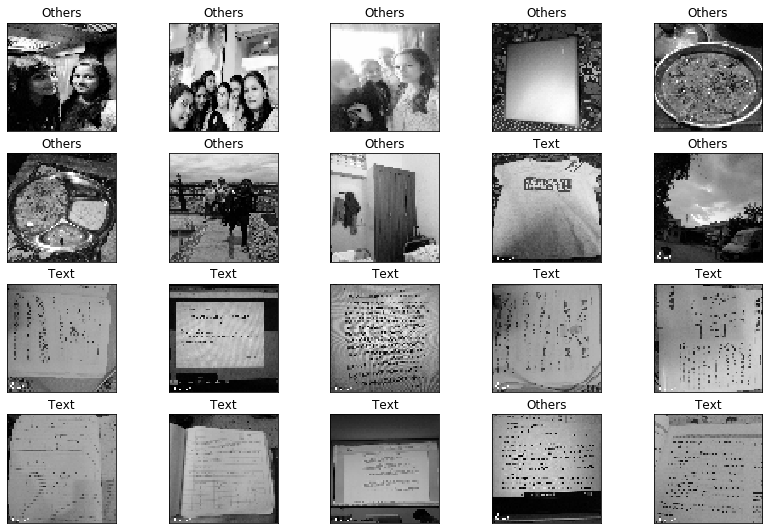

In [8]:
#labelling validation data after testing

cnt=0
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate (testing_images[0:20]):
    
    y=fig.add_subplot(6,5,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label='Others'
    else:
        str_label='Text'
        
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:15<00:00,  5.99it/s]


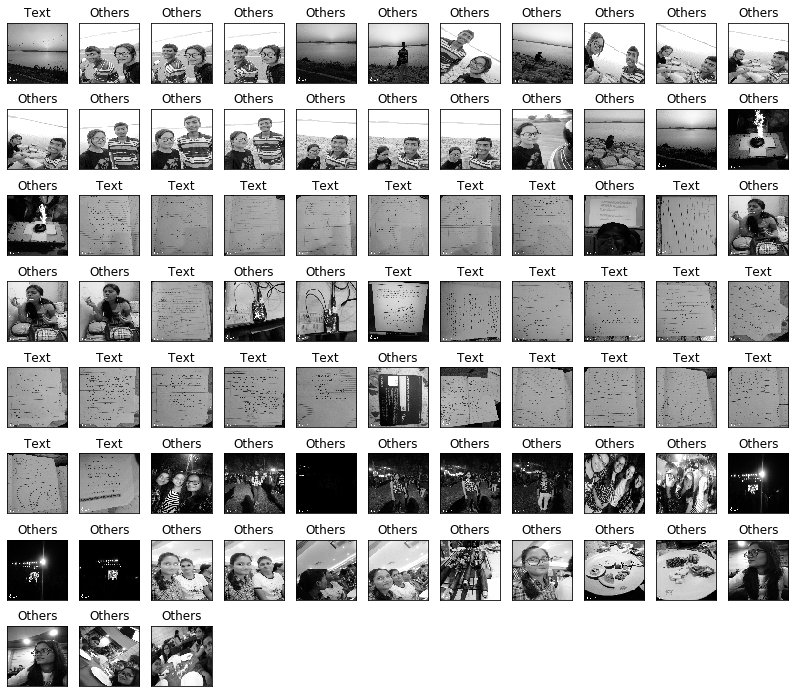

In [9]:
# labelling a completely new set of test data
#add the path of the image folder to be sorted
test_data1='C:\\Users\\Abhilasha\\Desktop\\my project\\final\\images'  
def test_dataf_with_label():
    test_imagesf=[]
    for i in tqdm(os.listdir(test_data1)):
        path=os.path.join(test_data1,i)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(64,64))
        test_imagesf.append([np.array(img),one_hot_label(i)])
    return test_imagesf
testing_imagesf = test_dataf_with_label()
img_data = np.array([i[0] for i in testing_imagesf]).reshape(-1,64,64,1)
lbl_data = np.array([i[1] for i in testing_imagesf])
cnt=0
fig=plt.figure(figsize=(14,14))
for cnt,data in enumerate (testing_imagesf[0:80]):
    
    y=fig.add_subplot(9,11,cnt+1)
    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label='Others'
        
    else:
        str_label='Text'

        
    y.imshow(img,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [10]:
score = model.evaluate(tst_img_data, tst_lbl_data, batch_size=100)
print(score[1])

20/20 [==============================] - 0s 12ms/step
0.8999999761581421


In [11]:
#making 2 new folders notes_new and others_new and saving the images
import shutil
import os
path1='C:\\Users\\Abhilasha\\Desktop\\my project\\final\\notes_new'
path2='C:\\Users\\Abhilasha\\Desktop\\my project\\final\\others_new'
if not os.path.exists(path1):
  os.makedirs(path1)
if not os.path.exists(path2):
  os.makedirs(path2)

path=[]
for i in tqdm(os.listdir(test_data1)):
    path.append(os.path.join(test_data1,i))
        
for cnt,data in enumerate (testing_imagesf[0:80]):

    img=data[0]
    data=img.reshape(1,64,64,1)
    model_out=model.predict([data])
    
    if np.argmax(model_out)==1:
        shutil.copy(path[cnt],path2)
    else:
        shutil.copy(path[cnt],path1)


        
    

100%|██████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<?, ?it/s]
